<a href="https://colab.research.google.com/github/Blaze2020/Data_Analysis_Projects/blob/main/Business_Case_Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Delhivery - Feature Engineering**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the Dataset
df= pd.read_csv('./drive/MyDrive/datasets/delhivery_data.csv')
data=df
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
# Covering to appropriate dtypes to string for further processing
df.select_dtypes(include=["object"]).columns
df=df.convert_dtypes(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  string 
 1   trip_creation_time              144867 non-null  string 
 2   route_schedule_uuid             144867 non-null  string 
 3   route_type                      144867 non-null  string 
 4   trip_uuid                       144867 non-null  string 
 5   source_center                   144867 non-null  string 
 6   source_name                     144867 non-null  string 
 7   destination_center              144867 non-null  string 
 8   destination_name                144867 non-null  string 
 9   od_start_time                   144867 non-null  string 
 10  od_end_time                     144867 non-null  string 
 11  start_scan_to_end_scan          144867 non-null  Int64  
 12  is_cutoff       

In [ ]:
# Describe the data
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
# Info regarding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  string 
 1   trip_creation_time              144867 non-null  string 
 2   route_schedule_uuid             144867 non-null  string 
 3   route_type                      144867 non-null  string 
 4   trip_uuid                       144867 non-null  string 
 5   source_center                   144867 non-null  string 
 6   source_name                     144867 non-null  string 
 7   destination_center              144867 non-null  string 
 8   destination_name                144867 non-null  string 
 9   od_start_time                   144867 non-null  string 
 10  od_end_time                     144867 non-null  string 
 11  start_scan_to_end_scan          144867 non-null  Int64  
 12  is_cutoff       

Some potential target variables could be :

1.**actual_time** : Predict the actual time taken for deliveries.<br>
2.**start_scan_to_end_scan** : If you want to predict the delivery time between scanning points.<br>
3.**actual_distance_to_destination** : If the goal is to predict the delivery distance.

In [ ]:
# Shape of the data
df.shape

(144867, 24)

**Data Cleanup**

In [ ]:
# No null values
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


**destination_name** and **source_name** contains null values.

In [ ]:
# Dropping the rows which contain the above values
df.dropna(axis=1,inplace=True)
print('The data columns after dropping null values\n', df.isna().sum())
print('The shape of data columns after dropping null values : ',df.shape)

The data columns after dropping null values
 data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64
The shape of data columns after dropping null values :  (144867, 24)


**Feature Extraction**

In [ ]:
# Converting Data types
# Converting datetime object to date
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['month'] = df['trip_creation_time'].dt.month
df['day'] = df['trip_creation_time'].dt.day
print(df[['trip_creation_time','month','day']].head(5))

          trip_creation_time  month  day
0 2018-09-20 02:35:36.476840      9   20
1 2018-09-20 02:35:36.476840      9   20
2 2018-09-20 02:35:36.476840      9   20
3 2018-09-20 02:35:36.476840      9   20
4 2018-09-20 02:35:36.476840      9   20


In [ ]:
# Split source and destination names
temp=df['source_name'].str.split('_',expand=True)
df['source_city']=temp[0]
df['source_place_code']=temp[1]
df['source_state']=temp[2]
temp=df['destination_name'].str.split('_',expand=True)
df['destination_city']=temp[0]
df['destination_place_code']=temp[1]
df['destination_state']=temp[2]
df[['source_city', 'source_place_code', 'source_state','destination_city', 'destination_place_code', 'destination_state']].head(5)

,source_city,source_place_code,source_state,destination_city,destination_place_code,destination_state
0,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
1,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
2,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
3,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
4,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)


**Calculating Time Taken**

In [ ]:
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])
df['time_taken']=(df['od_end_time']-df['od_start_time']).dt.total_seconds()

# Time taken
print(df['time_taken'])

0          5172.818197
1          5172.818197
2          5172.818197
3          5172.818197
4          5172.818197
              ...     
144862    25661.181838
144863    25661.181838
144864    25661.181838
144865    25661.181838
144866    25661.181838
Name: time_taken, Length: 144867, dtype: float64


**Merging Rows**

In [ ]:
agg_df=df.groupby(['trip_uuid','source_center','destination_center']).agg({
    'actual_time':'sum',
    'osrm_time':'sum',
    'actual_distance_to_destination':'sum',
    'osrm_distance':'sum',
    'time_taken':'sum'
}).reset_index()
agg_df.head(5)

,trip_uuid,source_center,destination_center,actual_time,osrm_time,actual_distance_to_destination,osrm_distance,time_taken
0,trip-153671041653548748,IND209304AAA,IND000000ACB,6484,3464,3778.765471,4540.1261,1.361453e+06
1,trip-153671041653548748,IND462022AAA,IND209304AAA,9198,4323,5082.046634,6037.6386,1.259377e+06
2,trip-153671042288605164,IND561203AAB,IND562101AAA,96,55,53.310332,60.3157,1.058983e+04
3,trip-153671042288605164,IND572101AAA,IND561203AAB,303,155,186.897974,209.1151,4.420061e+04
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2601,1427,1725.59025,1975.7409,6.009400e+05


**Handling Outliers**

In [ ]:
# Detect Outliers
temp=agg_df[['actual_time','osrm_time',
             'actual_distance_to_destination','osrm_distance','time_taken']]

Q1=temp[['actual_time','osrm_time','actual_distance_to_destination',
         'osrm_distance','time_taken']].quantile(0.25)
Q3=temp[['actual_time','osrm_time','actual_distance_to_destination',
         'osrm_distance','time_taken']].quantile(0.75)
IQR = Q3-Q1
temp = temp[~((temp<(Q1-1.5*IQR)) | (temp<(Q3+1.5*IQR))).any(axis=1)]
temp.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 5 to 26266
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   actual_time                     351 non-null    Int64  
 1   osrm_time                       351 non-null    Int64  
 2   actual_distance_to_destination  351 non-null    Float64
 3   osrm_distance                   351 non-null    Float64
 4   time_taken                      351 non-null    float64
dtypes: Float64(2), Int64(2), float64(1)
memory usage: 17.8 KB


**Encoding Categorical Values**

In [ ]:
aggregated_df = pd.get_dummies(df, columns=['route_type'])
aggregated_df.head(4)

,data,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,route_type_Carting,route_type_FTL
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,True,False
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,True,False
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,True,False
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,True,False


**Normalization/Standardization**

In [ ]:
scaler=MinMaxScaler()
temp.info()
temp[['actual_time','osrm_time',
      'actual_distance_to_destination','osrm_distance','time_taken']]=scaler
      .fit_transform(
    temp[['actual_time','osrm_time',
          'actual_distance_to_destination','osrm_distance','time_taken']]
)
temp.head(4)

<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 5 to 26266
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   actual_time                     351 non-null    float64
 1   osrm_time                       351 non-null    float64
 2   actual_distance_to_destination  351 non-null    float64
 3   osrm_distance                   351 non-null    float64
 4   time_taken                      351 non-null    float64
dtypes: float64(5)
memory usage: 16.5 KB


,actual_time,osrm_time,actual_distance_to_destination,osrm_distance,time_taken
5,0.516905,0.750603,0.659163,0.772332,0.552313
166,0.162424,0.207653,0.125496,0.212566,0.115125
352,0.137629,0.076468,0.044409,0.048933,0.007338
411,0.505585,0.677872,0.654189,0.653208,0.579983


**Hypothesis Testing and Visual Analysis**

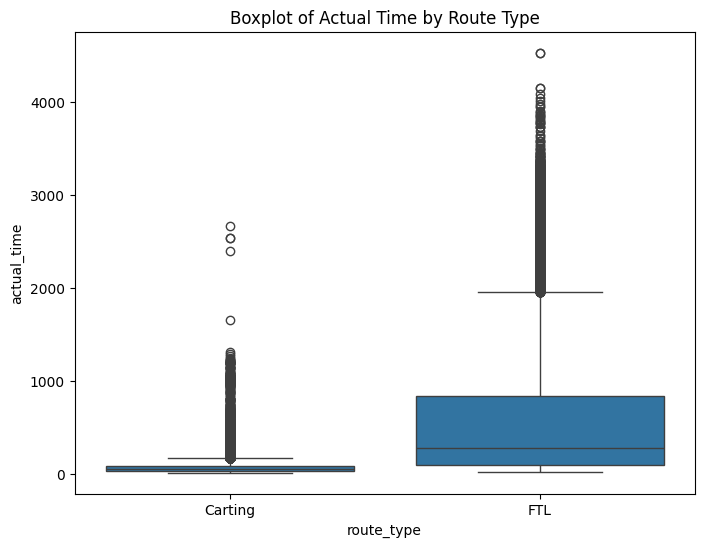

In [ ]:
# BoxPlot
plt.figure(figsize=(8,6))
sns.boxplot(x='route_type',y='actual_time',data=df)
plt.title('Boxplot of Actual Time by Route Type')
plt.show()

Here are the observations based on the boxplot comparing the actual time taken for two different route types, "Carting" and "FTL":

1.**Median Comparison**:

The "Carting" route type has a lower median actual time compared to the "FTL" route type. This indicates that, on average, "Carting" routes are faster.

2.**Outliers**:

The "Carting" route type has several outliers with actual times significantly higher than the rest of the data points.

The "FTL" route type also has outliers, but the spread of the data is much larger compared to "Carting."

4.**Interquartile Range (IQR)**:

The interquartile range for "FTL" is much larger than that for "Carting," indicating more variability in actual time for "FTL" routes.

5.**Maximum Actual Time**:

The maximum actual time for "FTL" is higher than that for "Carting," suggesting that "FTL" routes have instances where the delivery time is considerably longer.

6.**Data Spread**:

The overall data spread for "FTL" is broader, showing more diverse delivery times, whereas "Carting" has a more concentrated distribution.

**Hypothesis Testing**

In [ ]:
t_statistic,p_value = sc.ttest_ind(temp['actual_time'],temp['osrm_time'])

if p_value < 0.05:
  print('Reject H0','No relation between actual time and osrm time')
else:
  print('Reject H1','Relation between actual time and osrm time')

Reject H0 No relation between actual time and osrm time
